<a href="https://colab.research.google.com/github/chaitnko/project_work/blob/main/Apple_Stock_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv("AAPL.csv")
df.tail()
n = int(len(df)/2) + 2000
df = df[n:]
df

,Date,Open,High,Low,Close,Adj Close,Volume
6954,2008-07-08,25.057142,25.671429,24.677143,25.650000,22.265249,222087600
6955,2008-07-09,25.742857,25.844286,24.877142,24.892857,21.608019,223944000
6956,2008-07-10,24.988571,25.334286,24.481428,25.232857,21.903149,210172200
6957,2008-07-11,25.067142,25.301428,24.428572,24.654285,21.400925,232502900
6958,2008-07-14,25.605715,25.614286,24.725714,24.840000,21.562132,221513600
...,...,...,...,...,...,...,...
9904,2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
9905,2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
9906,2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100
9907,2020-03-31,255.600006,262.489990,252.000000,254.289993,254.289993,49250500


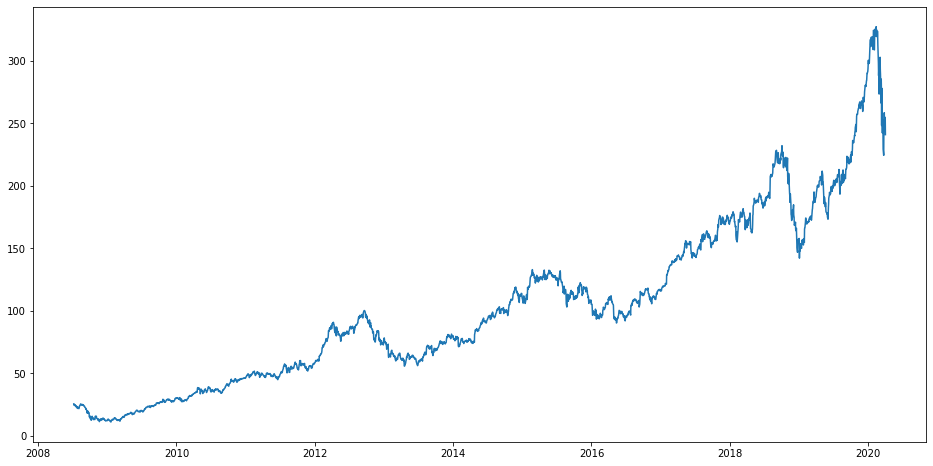

In [ ]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [ ]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values
train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

TypeError: ignored

In [ ]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])


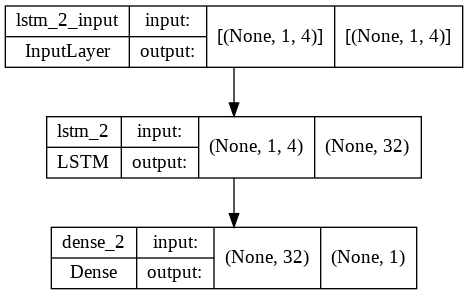

In [ ]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)


Epoch 1/100
258/258 [==============================] - 1s 3ms/step - loss: 0.1944
Epoch 2/100
258/258 [==============================] - 1s 3ms/step - loss: 0.2563
Epoch 3/100
258/258 [==============================] - 0s 2ms/step - loss: 0.2496
Epoch 4/100
258/258 [==============================] - 0s 2ms/step - loss: 0.2465
Epoch 5/100
258/258 [==============================] - 0s 2ms/step - loss: 0.2450
Epoch 6/100
258/258 [==============================] - 0s 2ms/step - loss: 0.2442
Epoch 7/100
258/258 [==============================] - 0s 2ms/step - loss: 0.2440
Epoch 8/100
258/258 [==============================] - 0s 2ms/step - loss: 0.2438
Epoch 9/100
258/258 [==============================] - 0s 2ms/step - loss: 0.2438
Epoch 10/100
258/258 [==============================] - 0s 2ms/step - loss: 0.2437
Epoch 11/100
258/258 [==============================] - 0s 2ms/step - loss: 0.2437
Epoch 12/100
258/258 [==============================] - 0s 2ms/step - loss: 0.2436
Epoch 13/100


In [ ]:
prediction = lstm.predict(X_test)
prediction


array([[ 63.822227],
       [ 65.79665 ],
       [ 61.08725 ],
       [ 61.1763  ],
       [ 59.79432 ],
       [ 61.062172],
       [ 59.68695 ],
       [ 54.71155 ],
       [ 59.08185 ],
       [ 61.974876],
       [ 61.89383 ],
       [ 62.078682],
       [ 62.099163],
       [ 63.344025],
       [ 60.244392],
       [ 59.277016],
       [ 59.660164],
       [ 62.858116],
       [ 65.86599 ],
       [ 65.0926  ],
       [ 66.0508  ],
       [ 66.45129 ],
       [ 69.723114],
       [ 69.885796],
       [ 70.558495],
       [ 69.81657 ],
       [ 68.819275],
       [ 67.31507 ],
       [ 67.755196],
       [ 68.510704],
       [ 68.90621 ],
       [ 69.607704],
       [ 69.78937 ],
       [ 70.644325],
       [ 71.865166],
       [ 71.85726 ],
       [ 71.525154],
       [ 73.31666 ],
       [ 74.25854 ],
       [ 74.868355],
       [ 75.72297 ],
       [ 76.76925 ],
       [ 77.97193 ],
       [ 76.618095],
       [ 75.37589 ],
       [ 74.81906 ],
       [ 77.30471 ],
       [ 77.8

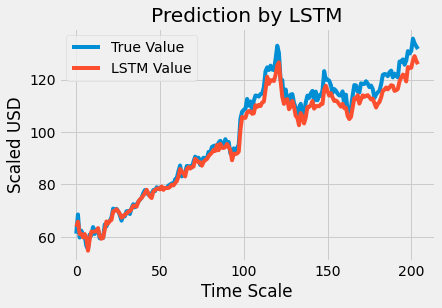

array([[[0.0061626 , 0.00369997, 0.00707852, 0.17579087]],

       [[0.00633513, 0.00432523, 0.00716144, 0.14690088]],

       [[0.0077586 , 0.00543521, 0.00816545, 0.15460117]],

       ...,

       [[0.41935566, 0.44371753, 0.43119637, 0.16519575]],

       [[0.44630951, 0.46048211, 0.44440266, 0.16419977]],

       [[0.44681275, 0.45000175, 0.44956491, 0.14387268]]])

In [ ]:
plt.plot(y_test, label='True Value')
plt.plot(prediction, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()
X_train

# New Section